In [1]:
import pandas as pd

# Load the training dataset
training_data_path = 'dataGaia_AB_train.csv'
training_data = pd.read_csv(training_data_path)

# Display the first few rows and basic information about the dataset
training_data.head(), training_data.describe(), training_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148538 entries, 0 to 148537
Data columns (total 29 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   ID          148538 non-null  int64  
 1   Unnamed: 0  148538 non-null  int64  
 2   RA_ICRS     148538 non-null  float64
 3   DE_ICRS     148538 non-null  float64
 4   Source      148538 non-null  float64
 5   Plx         148538 non-null  float64
 6   PM          148538 non-null  float64
 7   pmRA        148538 non-null  float64
 8   pmDE        148538 non-null  float64
 9   Gmag        148538 non-null  float64
 10  e_Gmag      148538 non-null  float64
 11  BPmag       148538 non-null  float64
 12  e_BPmag     148538 non-null  float64
 13  RPmag       148538 non-null  float64
 14  e_RPmag     148538 non-null  float64
 15  GRVSmag     84484 non-null   float64
 16  e_GRVSmag   84484 non-null   float64
 17  BP-RP       148538 non-null  float64
 18  BP-G        148538 non-null  float64
 19  G-

(   ID  Unnamed: 0    RA_ICRS   DE_ICRS        Source      Plx      PM    pmRA  \
 0   1           1  44.375187  2.895901  1.400000e+15   1.8937  16.954   7.031   
 1   2           2  42.959304  2.920459  1.550000e+15   2.9732   2.528   1.795   
 2   3           3  44.031079  3.203683  1.610000e+15   2.2337  10.776  -3.151   
 3   4           4  45.463599  3.138095  1.750000e+15   4.0179  10.053   1.828   
 4   5           5  43.784164  3.486814  2.060000e+15  11.6458  32.355  29.688   
 
      pmDE       Gmag  ...      G-RP   pscol    Teff      Dist     Rad  \
 0 -15.427  10.369156  ...  0.163792     NaN  9348.7  679.7121  2.4642   
 1   1.780  10.038978  ...  0.304139     NaN  7520.7  339.8108  1.9321   
 2 -10.305   9.810181  ...  0.338961  1.5956  7052.3  433.9715  2.9735   
 3   9.885   8.163041  ...  0.091842     NaN  9982.8  251.2483  2.2829   
 4 -12.863   6.855547  ...  0.257051     NaN  7192.3   85.7073  2.0194   
 
    Lum-Flame  Mass-Flame  Age-Flame   z-Flame  SpType-ELS  

The training dataset consists of 148,538 entries and 29 columns

# **Data preprocessing**

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the training dataset
training_data_path = 'dataGaia_AB_train.csv'
training_data = pd.read_csv(training_data_path)

In [4]:
# Clean the data: Drop unnecessary columns and handle missing values
training_data_cleaned = training_data.drop(columns=['ID', 'Unnamed: 0'])
for column in training_data_cleaned.columns:
    if training_data_cleaned[column].isnull().any() and training_data_cleaned[column].dtype != 'object':
        training_data_cleaned[column].fillna(training_data_cleaned[column].mean(), inplace=True)

        # Encoding categorical target variable
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
training_data_cleaned['SpType-ELS'] = label_encoder.fit_transform(training_data_cleaned['SpType-ELS'])

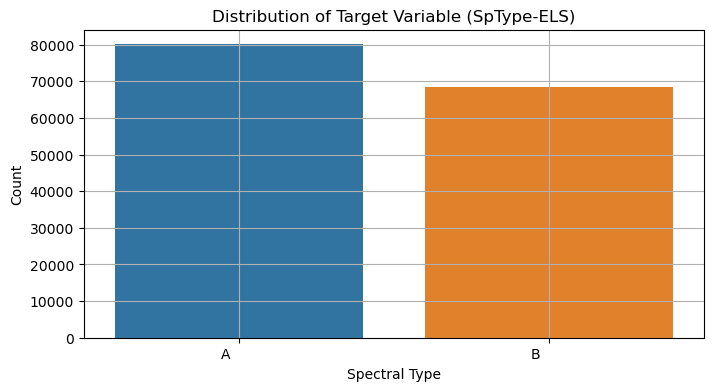

In [5]:
# Visualization 1: Distribution of the target variable
plt.figure(figsize=(8, 4))
sns.countplot(x='SpType-ELS', data=training_data_cleaned)
plt.title('Distribution of Target Variable (SpType-ELS)')
plt.xlabel('Spectral Type')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=label_encoder.classes_)
plt.grid(True)
plt.show()

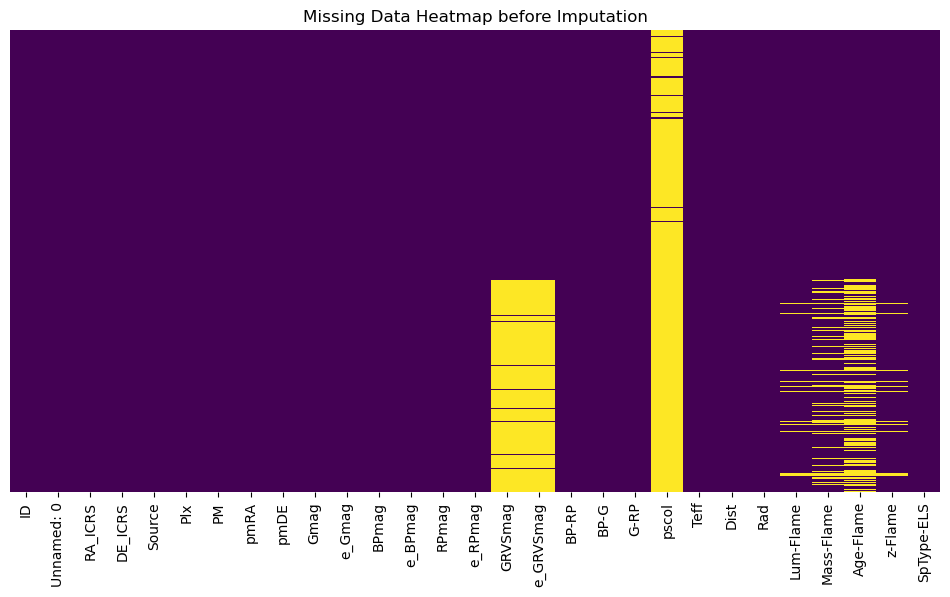

In [6]:
# Visualization 2: Missing data heatmap before imputation
plt.figure(figsize=(12, 6))
sns.heatmap(training_data.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap before Imputation')
plt.show()

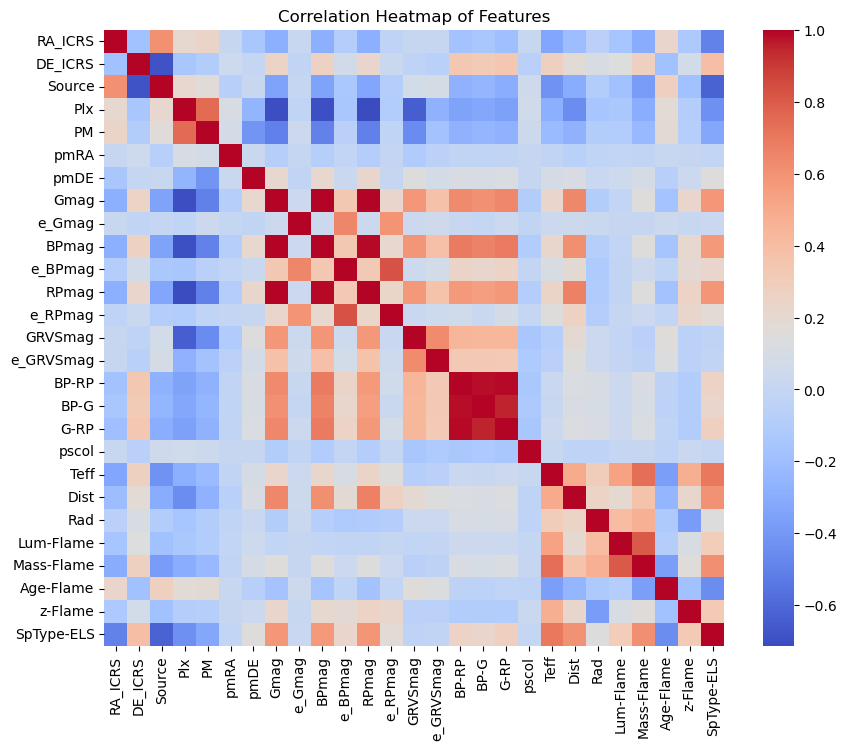

In [7]:
# Visualization 3: Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(training_data_cleaned.corr(), cmap='coolwarm', annot=False)
plt.title('Correlation Heatmap of Features')
plt.show()

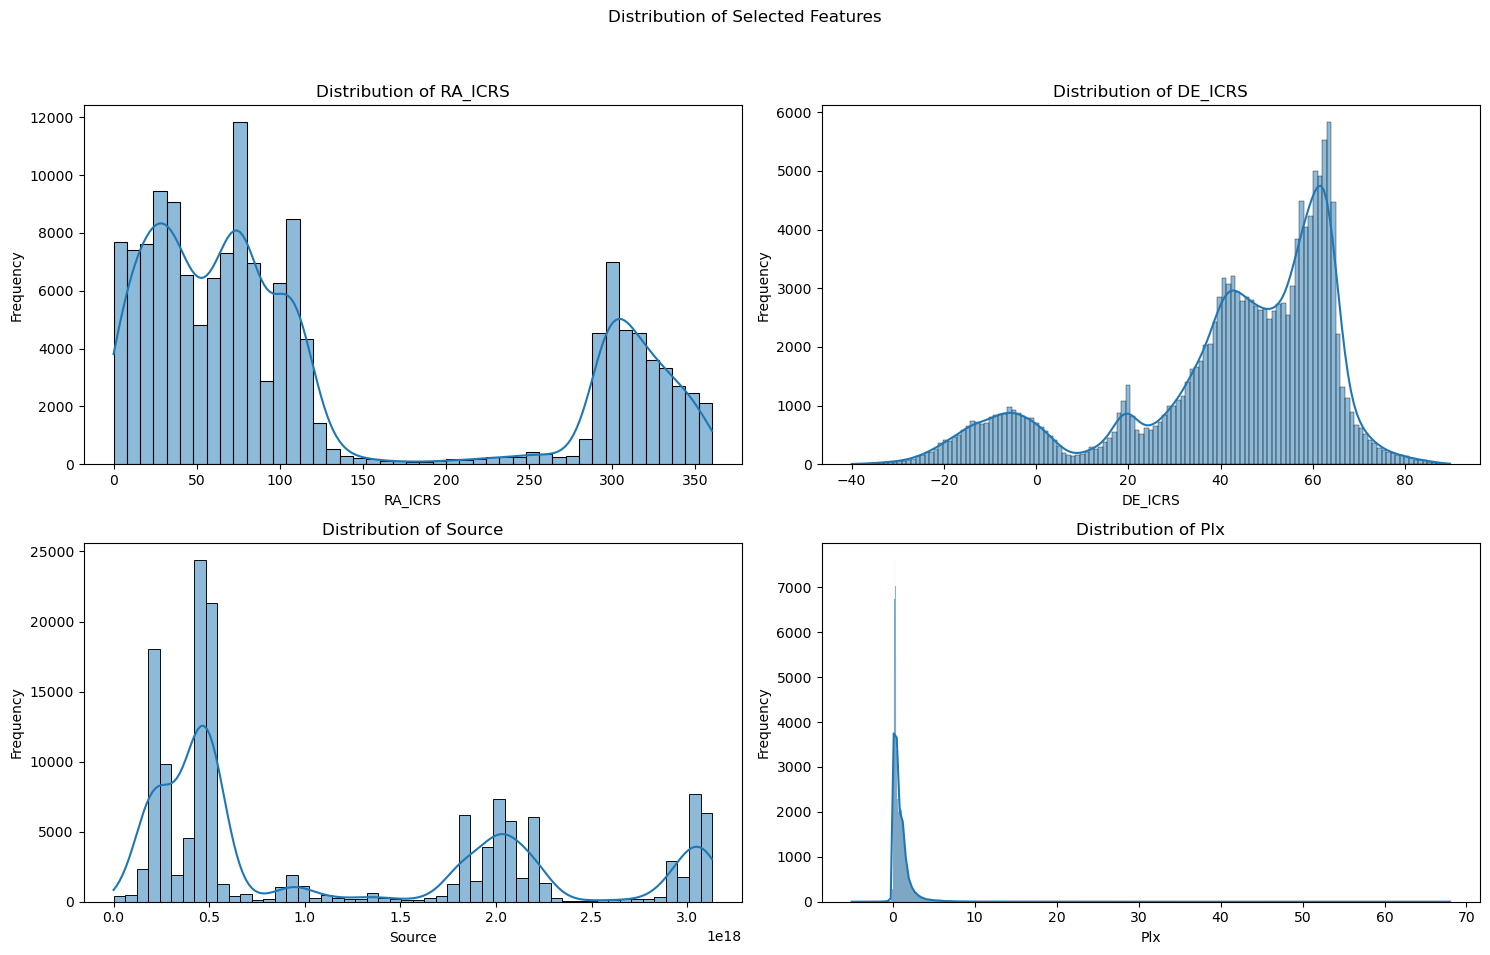

In [8]:
# Select a few numerical columns for feature distribution plots (arbitrarily chosen)
sample_features = training_data_cleaned.select_dtypes(include=['float64']).columns[:4]
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
fig.suptitle('Distribution of Selected Features')

for i, col in enumerate(sample_features):
    ax = axes[i//2, i%2]
    sns.histplot(training_data_cleaned[col], kde=True, ax=ax)
    ax.set_title(f'Distribution of {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


# ** data is split into training and validation sets**

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Prepare the data
# Splitting data into features and target
X = training_data_cleaned.drop('SpType-ELS', axis=1)
y = training_data_cleaned['SpType-ELS']

# Splitting the dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)



# **Model building and evaluation**

In [10]:
# Building models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Logistic Regression
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_scaled, y_train)
y_pred_log_reg = log_reg.predict(X_val_scaled)
log_reg_acc = accuracy_score(y_val, y_pred_log_reg)

# Decision Tree
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train_scaled, y_train)
y_pred_tree = tree_clf.predict(X_val_scaled)
tree_acc = accuracy_score(y_val, y_pred_tree)

# Support Vector Machine
svm_clf = SVC(random_state=42)
svm_clf.fit(X_train_scaled, y_train)
y_pred_svm = svm_clf.predict(X_val_scaled)
svm_acc = accuracy_score(y_val, y_pred_svm)

# Random Forest
forest_clf = RandomForestClassifier(random_state=42)
forest_clf.fit(X_train_scaled, y_train)
y_pred_forest = forest_clf.predict(X_val_scaled)
forest_acc = accuracy_score(y_val, y_pred_forest)

# Collecting accuracy for all models
model_accuracies = {
    "Logistic Regression": log_reg_acc,
    "Decision Tree": tree_acc,
    "Support Vector Machine": svm_acc,
    "Random Forest": forest_acc
}

model_accuracies



{'Logistic Regression': 0.9934361114851219,
 'Decision Tree': 0.9959606839908443,
 'Support Vector Machine': 0.9956913962569005,
 'Random Forest': 0.9969368520263902}

In [11]:
# Display the accuracies of all models
for model_name, accuracy in model_accuracies.items():
    print(f"{model_name} accuracy: {accuracy:.4f}")

Logistic Regression accuracy: 0.9934
Decision Tree accuracy: 0.9960
Support Vector Machine accuracy: 0.9957
Random Forest accuracy: 0.9969


Detailed Evaluation of Each Model

In [12]:
print("Logistic Regression Classification Report:\n")
print(classification_report(y_val, y_pred_log_reg))

Logistic Regression Classification Report:

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     16044
           1       0.99      0.99      0.99     13664

    accuracy                           0.99     29708
   macro avg       0.99      0.99      0.99     29708
weighted avg       0.99      0.99      0.99     29708



In [13]:
print("Decision Tree Classification Report:\n")
print(classification_report(y_val, y_pred_tree))

Decision Tree Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     16044
           1       0.99      1.00      1.00     13664

    accuracy                           1.00     29708
   macro avg       1.00      1.00      1.00     29708
weighted avg       1.00      1.00      1.00     29708



In [14]:
print("Support Vector Machine Classification Report:\n")
print(classification_report(y_val, y_pred_svm))

Support Vector Machine Classification Report:

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     16044
           1       1.00      0.99      1.00     13664

    accuracy                           1.00     29708
   macro avg       1.00      1.00      1.00     29708
weighted avg       1.00      1.00      1.00     29708



In [15]:
print("Random Forest Classification Report:\n")
print(classification_report(y_val, y_pred_forest))

Random Forest Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     16044
           1       1.00      1.00      1.00     13664

    accuracy                           1.00     29708
   macro avg       1.00      1.00      1.00     29708
weighted avg       1.00      1.00      1.00     29708



In [16]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def plot_confusion_matrix(y_true, y_pred, title):
    # Compute confusion matrix
    conf_matrix = confusion_matrix(y_true, y_pred)
    
    # Use seaborn to visualize the confusion matrix
    plt.figure(figsize=(6, 6))
    sns.heatmap(conf_matrix, annot=True, fmt="d", linewidths=.5, cmap="Blues")
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(title)
    plt.show()

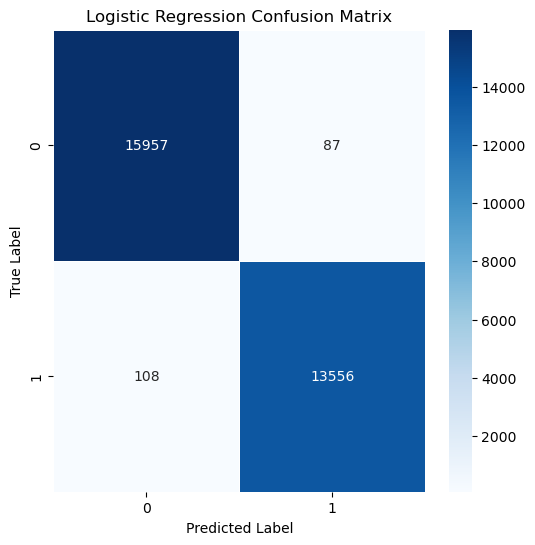

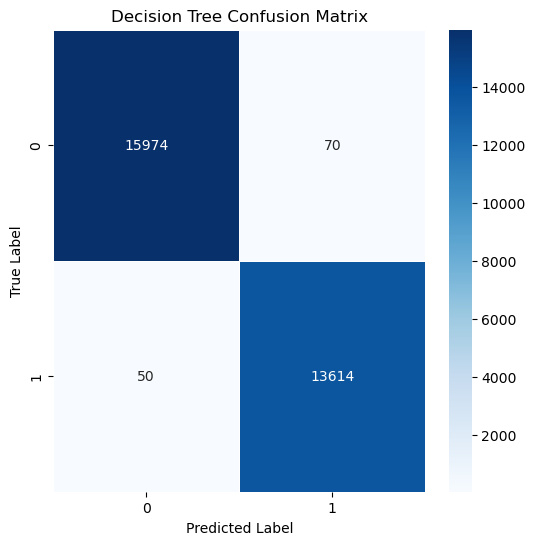

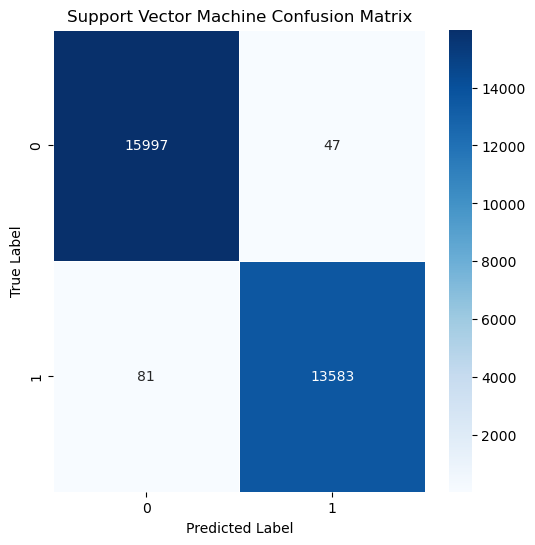

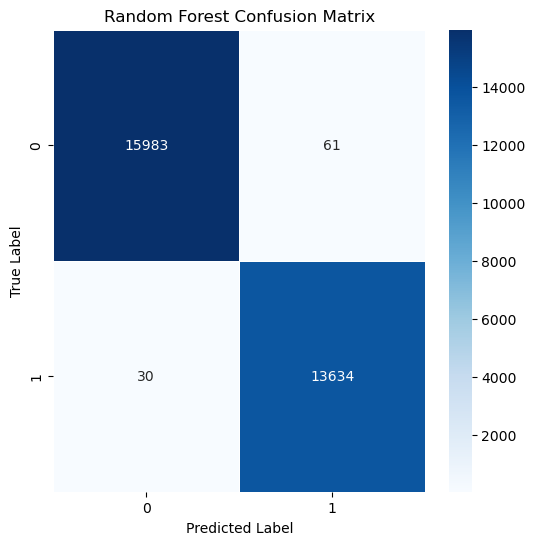

In [17]:
# Logistic Regression Confusion Matrix
plot_confusion_matrix(y_val, y_pred_log_reg, "Logistic Regression Confusion Matrix")

# Decision Tree Confusion Matrix
plot_confusion_matrix(y_val, y_pred_tree, "Decision Tree Confusion Matrix")

# Support Vector Machine Confusion Matrix
plot_confusion_matrix(y_val, y_pred_svm, "Support Vector Machine Confusion Matrix")

# Random Forest Confusion Matrix
plot_confusion_matrix(y_val, y_pred_forest, "Random Forest Confusion Matrix")

# select best model

In [23]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier

# Load your dataset (make sure to change the path to where your data is located)
training_data_path = 'dataGaia_AB_train.csv'
training_data = pd.read_csv(training_data_path)

# Preprocess the data: Drop unnecessary columns
training_data_cleaned = training_data.drop(columns=['ID', 'Unnamed: 0'])

# Fill missing values with the mean of the column
for column in training_data_cleaned.columns:
    if training_data_cleaned[column].isnull().any() and training_data_cleaned[column].dtype != 'object':
        training_data_cleaned[column].fillna(training_data_cleaned[column].mean(), inplace=True)

# Encode the target variable
label_encoder = LabelEncoder()
training_data_cleaned['SpType-ELS'] = label_encoder.fit_transform(training_data_cleaned['SpType-ELS'])

# Define features and target variables
X = training_data_cleaned.drop('SpType-ELS', axis=1)
y = training_data_cleaned['SpType-ELS']

# Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Train the model on the combined training and validation set
X_combined_scaled = np.vstack((X_train_scaled, X_val_scaled))
y_combined = np.concatenate((y_train, y_val))

final_model = RandomForestClassifier(random_state=42)
final_model.fit(X_combined_scaled, y_combined)

# Predict on the test set
y_pred_final = final_model.predict(X_test_scaled)

# Final accuracy
final_accuracy = accuracy_score(y_test, y_pred_final)
print(f"Final Model Test Accuracy: {final_accuracy:.4f}")

# Final classification report
print("Final Model Classification Report:\n")
print(classification_report(y_test, y_pred_final))

Final Model Test Accuracy: 0.9975
Final Model Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     12045
           1       1.00      1.00      1.00     10236

    accuracy                           1.00     22281
   macro avg       1.00      1.00      1.00     22281
weighted avg       1.00      1.00      1.00     22281



 Prepare Submission

In [24]:
# Load the unknown dataset
unknown_data_path = 'dataGaia_AB_unknown.csv'
unknown_data = pd.read_csv(unknown_data_path)

# Preprocess the unknown dataset
unknown_data_cleaned = unknown_data.drop(columns=['ID', 'Unnamed: 0'])
for column in unknown_data_cleaned.columns:
    if unknown_data_cleaned[column].isnull().any():
        unknown_data_cleaned[column].fillna(unknown_data_cleaned[column].mean(), inplace=True)

# Scale the unknown data using the same scaler as the training data
unknown_scaled = scaler.transform(unknown_data_cleaned)

# Predict using the final model
unknown_predictions = final_model.predict(unknown_scaled)

# Transform labels back to original encoding
unknown_predictions_labels = label_encoder.inverse_transform(unknown_predictions)

# Prepare the submission file
submission = pd.DataFrame({
    "ID": unknown_data['ID'],
    "SpType-ELS": unknown_predictions_labels
})

# Save the submission file
submission.to_csv('submissionF2.csv', index=False)

# Display the first few rows of the submission to ensure correctness
print(submission.head())

       ID SpType-ELS
0  119089    B      
1   24912    A      
2    6264    A      
3   81903    A      
4  110917    B      


In [25]:
# Ensure the submission has the same number of rows as the unknown dataset
print(f"Submission Rows: {len(submission)}")
print(f"Unknown Data Rows: {len(unknown_data)}")

Submission Rows: 37135
Unknown Data Rows: 37135
